In [55]:
import csv
import matplotlib
import pandas as pd
import numpy as np
import datetime
import random
import matplotlib.pyplot as plt

In [56]:
data = pd.read_csv("CompressionAggregatesAllIPs.csv")

In [57]:
x = np.array(data[data['host_ip'] == '165.242.90.129']['test_date'])
y = np.array(data[data['host_ip'] == '165.242.90.129']['discrimination_losses_str'])
z = np.array(data[data['host_ip'] == '165.242.90.129']['base_losses_str'])

In [82]:
x_axis = []
y_axis = []
z_axis = []
for i in range(0, len(x), 2):
    x_axis.append(str(x[i][:][6:16]))
    y_axis.append(str((y[i]/5000) * 100))
    z_axis.append(str((z[i]/5000) * 100))

In [83]:
x_axis

['4-20 16:49',
 '4-20 17:49',
 '4-20 18:49',
 '4-20 19:48',
 '4-20 20:48',
 '4-20 21:48',
 '4-20 22:48',
 '4-20 23:48',
 '4-21 00:48',
 '4-21 01:48',
 '4-21 02:48',
 '4-21 03:48',
 '4-21 05:16',
 '4-21 16:12',
 '4-21 17:12',
 '4-21 18:12',
 '4-21 19:12',
 '4-21 20:12',
 '4-21 21:12',
 '4-21 22:12',
 '4-22 00:12',
 '4-22 01:12',
 '4-22 02:12',
 '4-22 03:12',
 '4-22 04:12',
 '4-22 05:12',
 '4-22 06:12',
 '4-22 07:12',
 '4-22 08:12',
 '4-22 09:12',
 '4-22 10:12',
 '4-22 11:12',
 '4-22 12:12',
 '4-22 13:12',
 '4-22 14:12',
 '4-22 15:12',
 '4-22 16:12',
 '4-22 17:12',
 '4-22 18:12',
 '4-22 19:12',
 '4-22 20:12',
 '4-22 21:12',
 '4-22 22:12',
 '4-22 23:12']

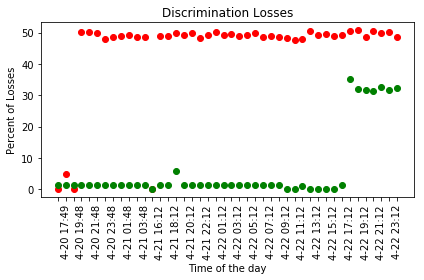

In [84]:
xn = range(len(x_axis))
plt.plot(xn, y_axis, 'ro')
plt.plot(xn, z_axis, 'go')
plt.xticks(xn, x_axis)

plt.plot()
ax = plt.gca()
#plt.axis([-1,32,-2,41])

plt.xlabel('Time of the day')
plt.ylabel('Percent of Losses')
plt.title("Discrimination Losses")

plt.xticks(rotation=90)
for label in ax.get_xaxis().get_ticklabels()[::2]:
    label.set_visible(False)
    
plt.tight_layout()


plt.show()

Plotly

In [76]:
import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as py
import plotly.graph_objs as go

In [121]:
trace1 = {"x":x_axis, "y":y_axis, "marker": {"color": "red", "size": 12},
          "mode": "markers",
          "name": "Discriminated",
          "type": "scatter"}


trace2 = {"x":x_axis, "y":z_axis, "marker": {"color": "green", "size": 12},
          "mode": "markers",
          "name": "Base",
          "type": "scatter"}



data = [trace1, trace2]

layout = {"title": "Packet Loss (pl2.sos.info.hiroshima-cu.ac.jp)",
          "xaxis": {"title": "Time", },
          "yaxis": {"title": "Percent of Loss"}}

layout = go.Layout(
    width = 2500,
    height = 2500,
    xaxis=dict(
        title = "Time",
        range=[16.5, 40.5]
    ),
    yaxis=dict(title="Percent of Loss"),
    
    title='Packet Loss (pl2.sos.info.hiroshima-cu.ac.jp)',
)

fig = go.Figure(data=data, layout=layout)

py.iplot(fig, filename='basic_dot-plot',image='png')